In [ ]:
directory = ["Dataset_complete/Trackpictures/nice_weather/nice_weather_thusis_filisur_20200827_pixelated/",
        "Dataset_complete/Trackpictures/nice_weather/nice_weather_filisur_thusis_20200824_pixelated/",
       "Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/",
       "Dataset_complete/Trackpictures/bad_weather/bad_weather_thusis_filisur_20200829_pixelated/"]

files = ['nice_weather_thusis_filisur.csv', 'nice_weather_filisur_thusis.csv','night_thusis_filisur.csv',
         'bad_weather_thusis_filisur.csv']

In [ ]:
import os
import piexif
import csv

for dir_,file_ in zip(directory,files):#print(dir_)
    with open(file_,'w') as f1:
        writer=csv.writer(f1, delimiter='\t',lineterminator='\n',)
        for filename in os.listdir(dir_):
            if filename.endswith(".jpg"):
                input_ = []
                input_.append(dir_+filename)
                exif_dict = piexif.load(dir_+filename)
                for tag in exif_dict["GPS"]:
                    if(piexif.TAGS["GPS"][tag]["name"] in ["GPSLatitude","GPSLongitude","GPSAltitude"]):
                        input_.append(exif_dict["GPS"][tag][0]/1000000.0)
                writer.writerow(input_)



In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

for file_ in files:
    scaler = StandardScaler()
    df = pd.read_csv(file_,header=None,sep="\t")
    data = scaler.fit_transform(df.iloc[:,1:3].values)
    df[4] = data[:,0]
    df[5] = data[:,1]
    df.columns = ['path', 'latitude', 'longitude', 'altitude', 'std_latitude','std_longitude']
    df.to_csv(file_,index=False,sep="\t")

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0],data[:,1])

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0],data[:,1])

In [298]:
import pandas as pd

day = pd.read_csv("nowyouseeme/data/nice_weather_thusis_filisur.csv")
night = pd.read_csv("nowyouseeme/data/night_thusis_filisur.csv")

In [299]:
day

,path,latitude,longitude,altitude,std_latitude,std_longitude
0,Dataset_complete/Trackpictures/nice_weather/ni...,46.699552,9.440351,703.185,1.716624,-1.723879
1,Dataset_complete/Trackpictures/nice_weather/ni...,46.699552,9.440351,703.185,1.716624,-1.723879
2,Dataset_complete/Trackpictures/nice_weather/ni...,46.699476,9.440373,703.237,1.710810,-1.723586
3,Dataset_complete/Trackpictures/nice_weather/ni...,46.699476,9.440373,703.237,1.710810,-1.723586
4,Dataset_complete/Trackpictures/nice_weather/ni...,46.699476,9.440373,703.237,1.710810,-1.723586
...,...,...,...,...,...,...
4895,Dataset_complete/Trackpictures/nice_weather/ni...,46.675433,9.683147,1080.855,-0.128548,1.501823
4896,Dataset_complete/Trackpictures/nice_weather/ni...,46.675433,9.683147,1080.855,-0.128548,1.501823
4897,Dataset_complete/Trackpictures/nice_weather/ni...,46.675434,9.683183,1081.366,-0.128472,1.502301
4898,Dataset_complete/Trackpictures/nice_weather/ni...,46.675434,9.683183,1081.366,-0.128472,1.502301


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

X = np.array(day[['latitude','longitude']])
#kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
distorsions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [ ]:
X = np.array(day[['latitude','longitude']])
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
kmeans.labels_

In [319]:
import pickle
with open('kmeans.pickle', 'wb') as handle:
    pickle.dump(kmeans, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
print(np.array(Y).shape)
print(np.array(Y).shape)

In [ ]:
Y = []
for i in range(0, X.shape[0]):
    Y.append((kmeans.predict([X[i]])[0]))

np.unique(Y)
#plt.plot(X,np.array(Y),'o')
 

In [300]:
dataset = pd.DataFrame({'path': day['path'], 'Column1': X[:, 0], 'Column2': X[:, 1],'Column3': Y})

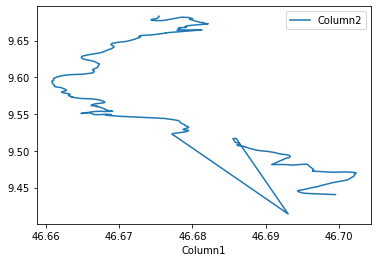

In [301]:
dataset.plot(x='Column1',y='Column2')

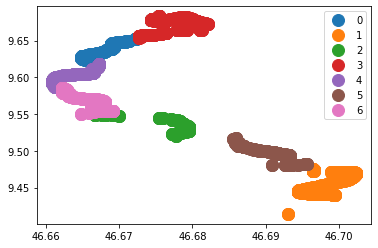

In [302]:
groups = dataset.groupby('Column3')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Column1, group.Column2, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

In [ ]:
# Load the pretrained model
model = models.resnet18(pretrained=True)
# Use the model object to select the desired layer
layer = model._modules.get('avgpool')

In [ ]:
# Set model to evaluation mode
model.eval()

In [ ]:
scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

In [ ]:
from torchsummary import summary
summary(model,(3,64,64))

In [ ]:
def get_vector(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name)
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(512)
    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data.reshape(o.data.size(1)))
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    model(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return my_embedding

In [ ]:
feature_vectors = []
for i in range(day.shape[0]):
    feature_vectors.append(get_vector(day['path'][i]).numpy())

In [303]:
fv = []
for i in feature_vectors:
    fv.append(i.numpy())

In [313]:
day["feature_vectors"] = feature_vectors
#day["feature_vectors"] = fv

In [283]:
fv_array = np.array(fv).shape

In [314]:
import pickle
with open('feature_vector.pickle', 'wb') as handle:
    pickle.dump(day, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [315]:
day

,path,latitude,longitude,altitude,std_latitude,std_longitude,feature_vectors
0,Dataset_complete/Trackpictures/nice_weather/ni...,46.699552,9.440351,703.185,1.716624,-1.723879,"[tensor(1.8698), tensor(3.1618), tensor(1.6428..."
1,Dataset_complete/Trackpictures/nice_weather/ni...,46.699552,9.440351,703.185,1.716624,-1.723879,"[tensor(2.0170), tensor(2.8036), tensor(1.6879..."
2,Dataset_complete/Trackpictures/nice_weather/ni...,46.699476,9.440373,703.237,1.710810,-1.723586,"[tensor(2.1227), tensor(3.4470), tensor(2.0281..."
3,Dataset_complete/Trackpictures/nice_weather/ni...,46.699476,9.440373,703.237,1.710810,-1.723586,"[tensor(2.8811), tensor(3.2254), tensor(2.2800..."
4,Dataset_complete/Trackpictures/nice_weather/ni...,46.699476,9.440373,703.237,1.710810,-1.723586,"[tensor(2.4509), tensor(2.5642), tensor(2.3871..."
...,...,...,...,...,...,...,...
4895,Dataset_complete/Trackpictures/nice_weather/ni...,46.675433,9.683147,1080.855,-0.128548,1.501823,"[tensor(3.1145), tensor(1.9387), tensor(1.8053..."
4896,Dataset_complete/Trackpictures/nice_weather/ni...,46.675433,9.683147,1080.855,-0.128548,1.501823,"[tensor(3.5077), tensor(1.8265), tensor(1.5524..."
4897,Dataset_complete/Trackpictures/nice_weather/ni...,46.675434,9.683183,1081.366,-0.128472,1.502301,"[tensor(3.0435), tensor(1.4334), tensor(1.5848..."
4898,Dataset_complete/Trackpictures/nice_weather/ni...,46.675434,9.683183,1081.366,-0.128472,1.502301,"[tensor(3.8073), tensor(1.6699), tensor(1.5337..."


In [ ]:
day.to_csv("nice_weather_thusis_filisur_withFeatureVector.csv")

In [ ]:
#pic_one = str(input("Input first image name\n"))
#pic_two = str(input("Input second image name\n"))

#for i in range(100):
pic_one_vector = get_vector("Dataset_complete/Trackpictures/nice_weather/nice_weather_thusis_filisur_20200827_pixelated/image_00117.jpg")
pic_two_vector = get_vector("Dataset_complete/Trackpictures/bad_weather/bad_weather_thusis_filisur_20200829_pixelated/image_00001.jpg")

# Using PyTorch Cosine Similarity
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
cos_sim = cos(pic_one_vector.unsqueeze(0),
          pic_two_vector.unsqueeze(0))
print('\nCosine similarity: {0}\n'.format(cos_sim))


In [ ]:
import piexif
import operator
import tensorflow as tf
import pickle

real_image = "Dataset_complete/Trackpictures/bad_weather/bad_weather_thusis_filisur_20200829_pixelated/image_00001.jpg"
real_image_gps = []
#day = pd.read_csv("nice_weather_thusis_filisur_withFeatureVector.csv")
with open('feature_vector.pickle', 'rb') as handle:
    day = pickle.load(handle)
with open('kmeans.pickle', 'rb') as handle:
    kmeans = pickle.load(handle)
    
exif_dict = piexif.load(real_image)
for tag in exif_dict["GPS"]:
    if(piexif.TAGS["GPS"][tag]["name"] in ["GPSLatitude","GPSLongitude"]):
        real_image_gps.append(exif_dict["GPS"][tag][0]/1000000.0)
        
real_image_cluster = kmeans.predict([np.array(real_image_gps)])[0]

In [317]:
real_image_feature_vector = get_vector(real_image)
similar_images = {}

for img_path in groups.get_group(real_image_cluster).path:
    image_vector = day.loc[day['path'] == img_path]['feature_vectors'].values[0]
    cos = nn.CosineSimilarity(dim=1, eps=1e-6)
    cos_sim = cos(real_image_feature_vector.unsqueeze(0),
          image_vector.unsqueeze(0))
    similar_images[img_path] = cos_sim

similar_img_path = max(similar_images.items(), key=operator.itemgetter(1))[0]



In [318]:
similar_img_path

'Dataset_complete/Trackpictures/nice_weather/nice_weather_thusis_filisur_20200827_pixelated/image_00122.jpg'